In [1]:
import numpy as np
import sys, os, git, lammps_logfile
import warnings
warnings.filterwarnings("ignore")

In [3]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[-2]
tutorial_name = path_in_folder.split("/")[-1]
print("level:" , level, "& tutorial name:", tutorial_name)
sys.path.append(git_path + "/docs/sphinx/source/tutorials/figures/pyplot-perso")
from plttools import PltTools
path_figures = current_path[len(git_path):] + '/'
data_path = git_path + "/docs/lammpstutorials-inputs/" + level + "/" + tutorial_name + "/pureH2O/"
print("data path: ", data_path)

level: level2 & tutorial name: polymer-in-water
data path:  /home/simon/Git/LAMMPS/tutorials/docs/lammpstutorials-inputs/level2/polymer-in-water/pureH2O/


In [4]:
time, density = np.loadtxt(data_path+"density.dat").T
density *= 1000 # molecule/nm3
time /= 1000 # ps

In [5]:
final_density = np.mean(density[-10:])
print("final density in kg/m3", np.round(final_density/(1e-9)**3/6.022e23*18e-3,3))

final density in kg/m3 947.591


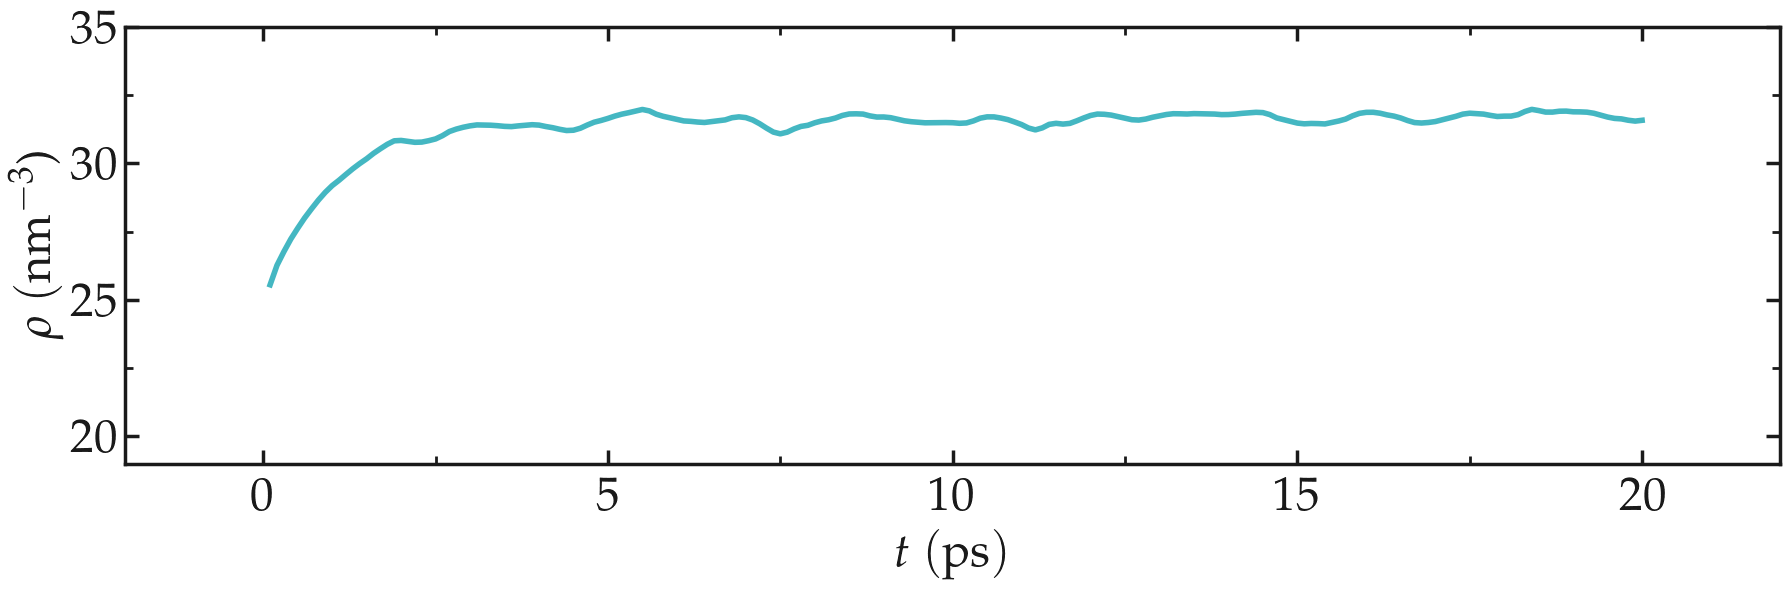

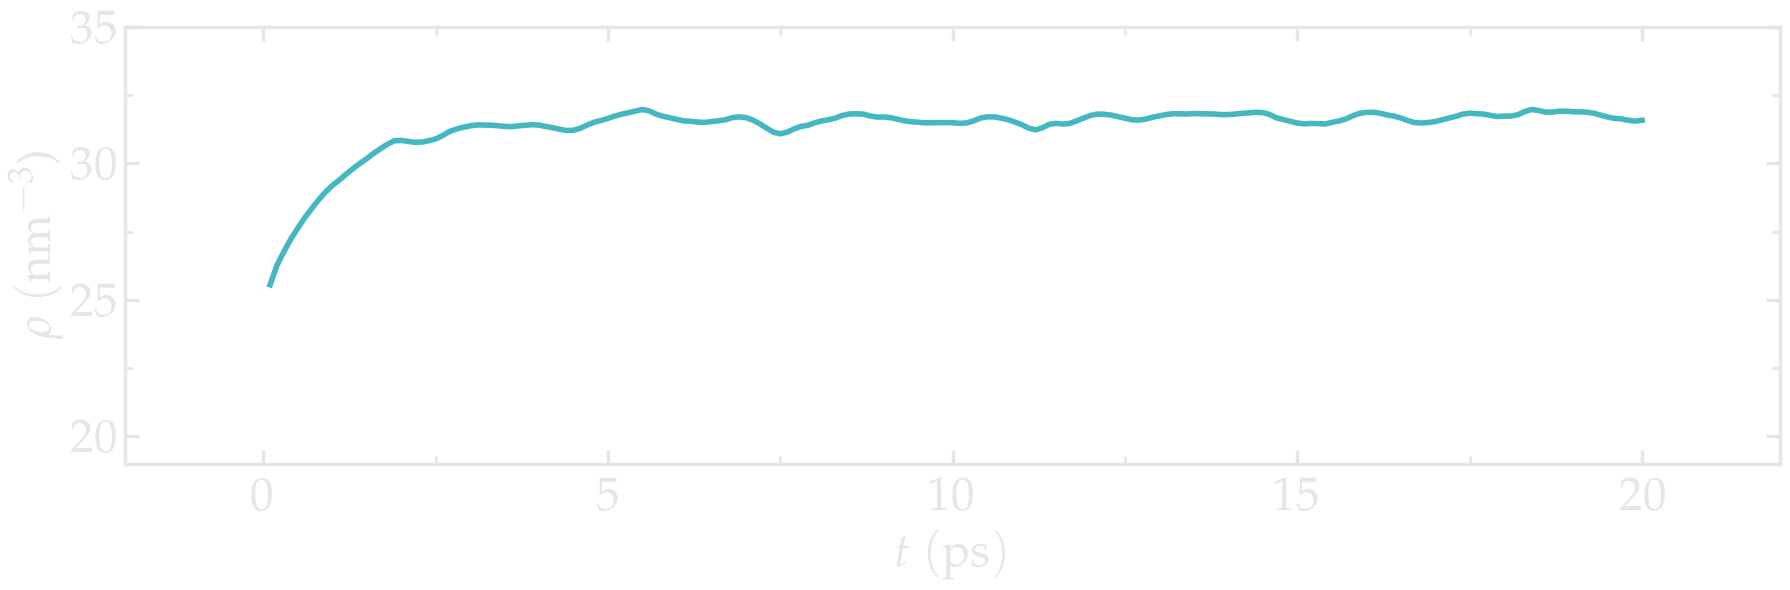

In [7]:
filename = "density_H2O"
for dark_mode in [False, True]:
    myplt = PltTools()
    myplt.prepare_figure(fig_size = (18,6), dark_mode = dark_mode,
                        transparency = True, use_serif=True, n_line=1)
    myplt.add_panel()
    myplt.add_plot(x = time, y = density, linewidth_data = 3,
                   marker = "-", data_color = 0, markersize = 12)
    myplt.complete_panel(ylabel = r'$\rho ~ (\mathrm{nm}^{-3}$)',
                         xlabel = r'$t ~ \mathrm{(ps)}$',
                         xpad = 10, legend=False, handlelength_legend=1)
    myplt.set_boundaries( x_ticks=np.arange(0, 25, 5), y_ticks=np.arange(20, 38, 5),
                         x_boundaries=(-2, 22), y_boundaries=(19, 35))
    # myplt.add_subplotlabels()
    myplt.save_figure(filename = filename, saving_path = './')

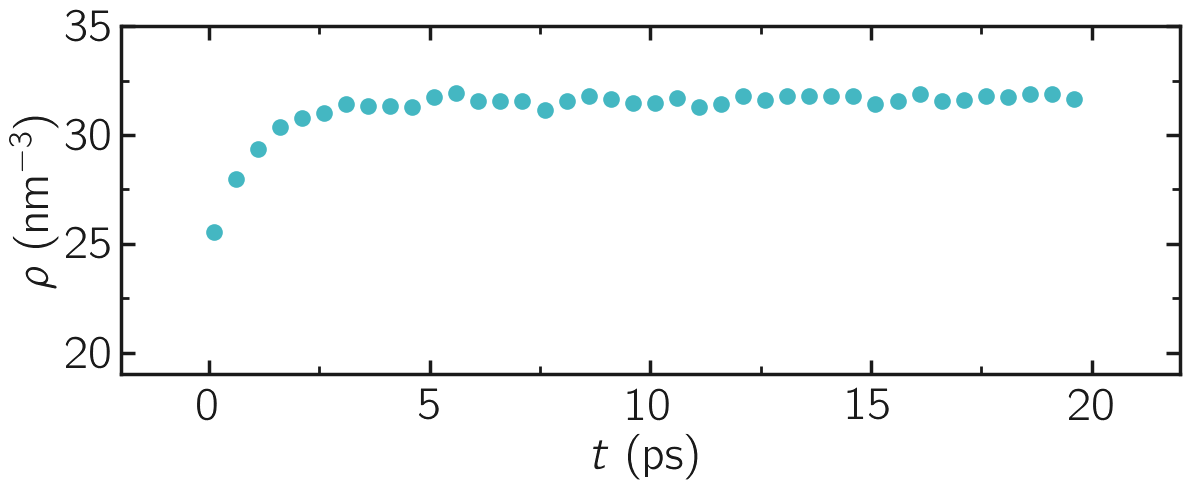

In [10]:
filename = "density-article"
myplt = PltTools()
myplt.prepare_figure(fig_size = (12,5), dark_mode = False,
                    transparency = False, use_serif=False, n_line=1)
myplt.add_panel()
myplt.add_plot(x = time[::5], y = density[::5], linewidth_data = 3,
                marker = "o", data_color = 0, markersize = 12)
myplt.complete_panel(ylabel = r'$\rho ~ (\mathrm{nm}^{-3}$)',
                        xlabel = r'$t ~ \mathrm{(ps)}$',
                        xpad = 10, legend=False, handlelength_legend=1)
myplt.set_boundaries( x_ticks=np.arange(0, 25, 5), y_ticks=np.arange(20, 38, 5),
                        x_boundaries=(-2, 22), y_boundaries=(19, 35))
# myplt.add_subplotlabels()
myplt.save_figure(filename = filename, saving_path = './')